In [2]:
import pandas as pd

In [4]:
# Using read_csv to read in plain-test tabular data
data = pd.read_csv("/Users/mickey.rice/Desktop/abide2.tsv", sep ='\t')

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (1004, 1446)


,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Supervised learning: regression and classifiction 

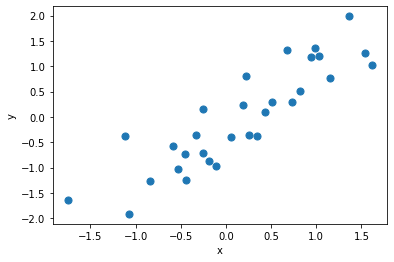

In [73]:
# Regression
# fix seed to produce dterministic results
np.random.seed(100)

x = np.random.normal(size=30)
y = x + 0.5 * np.random.normal(size = 30)

plt.scatter(x,y, s=50)
plt.xlabel('x')
plt.ylabel('y');

Parameter estimates (intercept and slope): [-0.18411246  1.06070208]


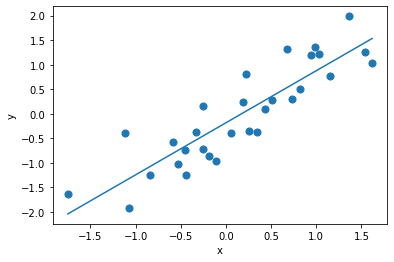

In [72]:
# Add intercept
x_with_int = np.hstack((np.ones((len(x), 1)), x[:, None]))

# get least-squares solution
w = np.linalg.lstsq(x_with_int, y, rcond = None)[0]
print("Parameter estimates (intercept and slope):", w)

plt.scatter(x, y, s=50)
plt.xlabel('x')
plt.ylabel('y');

# plot best fit line
xx = np.linspace(x.min(), x.max()).T
plt.plot(xx, w[0] + w[1] * xx)
np.linalg.lstsq(x[:, None], y, rcond = None);

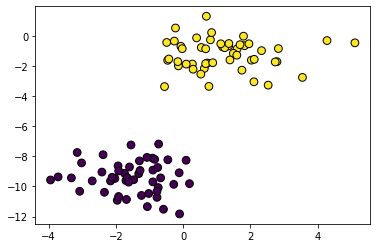

In [40]:
# Classification 
# generate structured data using scikit-learn
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolor = 'k', linewidth = 1);

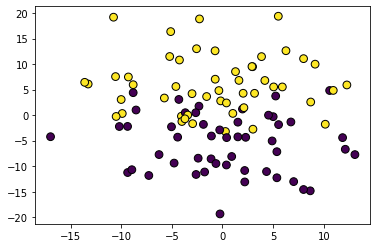

In [42]:
X, y = make_blobs(centers = 2, cluster_std = 6, random_state = 100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolor = 'k', linewidth = 1);

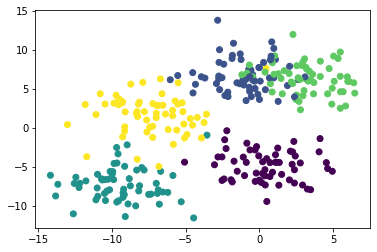

In [45]:
X, y = make_blobs(300, centers = 5, cluster_std = 2, random_state = 100)
plt.scatter(X[:, 0], X[:, 1], c=y);

## Unsupervised learning: clustering and dimensionality reduction 

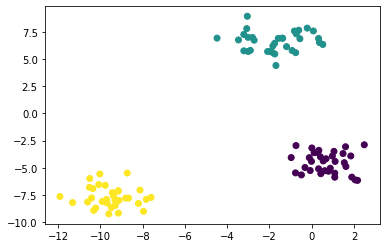

In [49]:
# Clustering
X, y = make_blobs(random_state=100)
plt.scatter(X[:, 0], X[:, 1], c=y);

Text(0.5, 1.0, 'What we see')

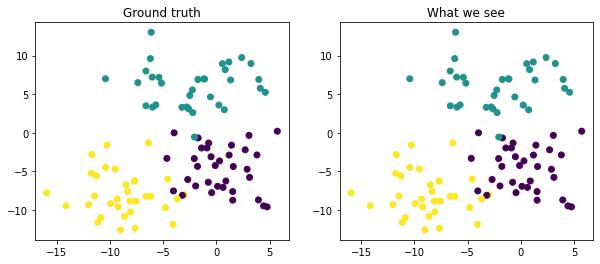

In [52]:
X, _ =  make_blobs(centers=3, cluster_std=3, random_state=100)

fix, axes = plt.subplots(1, 2, figsize = (10, 4))

axes[0].scatter(X[:, 0], X[:, 1], c=y);
axes[0].set_title("Ground truth")
axes[1].scatter(X[:, 0], X[:, 1], c=y);
axes[1].set_title("What we see")

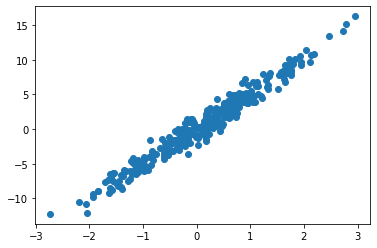

In [57]:
# Dimensionality reduction 
x = np.random.normal(size=300)
y = x * 5 + np.random.normal(size=300)

plt.scatter(x, y);

## Using scikitlearn with the abide2 dataset

In [58]:
# Filter specific variables by name
# We want all features that match 'fs'put in X_all
X_all = data.filter(like='fs')

X_all.head()

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,456.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,315.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


In [95]:
# Create a numpy array with the age values
y = data['age'].values

In [64]:
# Apply the LinearRegression() estimator

N_FEATURES = 5

# Sample the row/columns
X = X_all.sample(N_FEATURES, axis = 1, random_state = 100)

# Emphasize again where the y is coming from 
y = data['age'].values

In [65]:
from sklearn.linear_model import LinearRegression

# Initialize the esimator 
model = LinearRegression()

In [96]:
# Fitting the model
model.fit(X, y)

LinearRegression()

In [67]:
print("Estimated intercept:", model.intercept_.round(2))
print("Estimated coefficients:", model.coef_.round(2))

Estimated intercept: 53.81
Estimated coefficients: [-3.94  0.02 -8.92 -0.   -0.01]


In [81]:
# Generating predictions
y_pred = model.predict(X)

y_pred

array([15.69036168, 11.17854891, 16.67486452, ..., 11.42650131,
       10.54443185, 14.57754089])

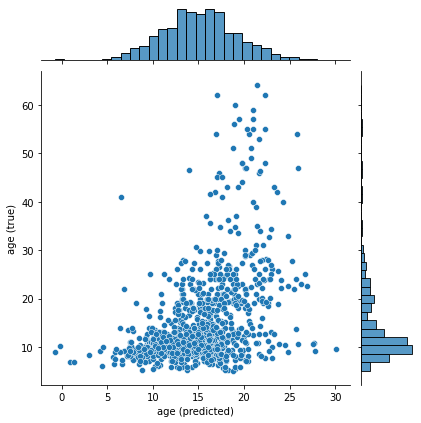

In [98]:
# Visualize the predictions
g = sns.jointplot(pd.DataFrame(dict(y_pred=y_pred, y=y)), x="y_pred", y="y").set_axis_labels("age (predicted)", "age (true)")

 ## Using statsmodel with the abide2 dataset

In [91]:
import statsmodels.api as sm

In [97]:
tmp_X = sm.tools.add_constant(X)
ols = sm.OLS(y, tmp_X)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           3.28e-46
Time:                        17:14:43   Log-Likelihood:                -3565.3
No. Observations:                1004   AIC:                             7143.
Df Residuals:                     998   BIC:                             7172.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               53.8130      3.323     16.196      0.000      47.293      60.333
fsCT_R_a24_ROI      -3.9354      0.706     -5.574      0.000      -5.321      -2.550
fsArea_R_d32_ROI     0.0152      0.004      3.888      0.000       0.008       0.023
fsCT_L_PBelt_ROI    -8.9219      1.035     -8.618      0.000     -10.954      -6.890
fsLGI_L_POS2_ROI    -0.0032      0.002     -1.401      0.162      -0.008       0.001
fsVol_L_FOP1_ROI    -0.0122      0.002     -5.976      0.000      -0.016      -0.008
==============================================================================
Omnibus:                      439.100   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2228.847
Skew:                           1.996   Prob(JB):                         0.00
Kurtosis:                       9.111   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluate if the model is good

In [99]:
from sklearn.metrics import r2_score

# Generate predicted values so we can compare them with the ground truth
y_pred = model.predict(X)


# Scoring functions are called by passing an array of true scores and an array of predicted scored as inputs
r2_score(y, y_pred)

0.2000318750191794

This means that 20% of variance in age is explained by our fitted linear regression model. 

In [101]:
# Built-in scoring

# Initialize the estimator and fit the data
est = LinearRegression()
est.fit(X, y)

# Instead of generating predictions expicitly, we just call .score(). We lose the ability to specifiy the metric: LinearRegression.score() always used the R^2 metric.
est.score(X, y)

0.2000318750191794

## Overfitting and underfitting

In [102]:
# creating data to show underfitting 
# wrap the data generation in a fucntion so we can call it again later
def make_xy(n, sd=0.5):
    '''Generate x and y variables from a fixed quadratic function, adding noise.'''
    x = np.random.normal(size=n)
    y = (0.7 * x) ** 2 + 0.1 * x + np.random.normal(10, sd, size=n)
    return x, y

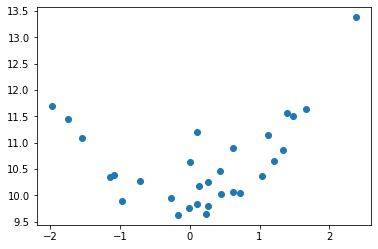

In [103]:
# fix the random number generator so we ger reproducible results
np.random.seed(10)

x, y = make_xy(30)
plt.scatter(x, y);

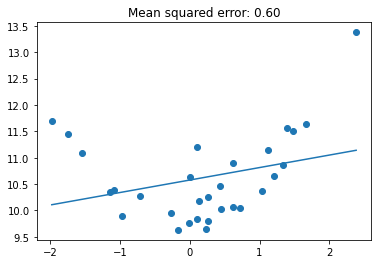

In [107]:
from sklearn.metrics import mean_squared_error

est =  LinearRegression()
est.fit(x[:, None], y)

x_range = np.linspace(x.min(), x.max(), 100)
reg_line = est.predict(x_range[:, None])

plt.scatter(x, y)
plt.plot(x_range, reg_line);
mse = mean_squared_error(y, est.predict(x[:, None]))
plt.title(f"Mean squared error: {mse:.2f}");

The linear regression model is underfitting the data!

In [113]:
# Fixing the underfitting!

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# wrap the pipeline creation process in a function, so we can
# parametize the degree of the polynomial

def make_pipeline(degree=1):
    # Polynomial regressin is just linear regression with polynomial features, so we can scikit-learn's
    # PolynomialFeatures helper to generate an expanded design matrix as an extra pipeline step before model estimation. 
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Construct an sklearn Pipelines, which behaves like a single estimator
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", LinearRegression())
    ])
    return pipeline

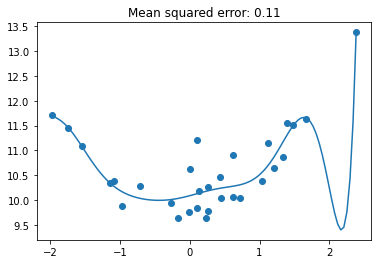

In [115]:
# Play around with it!
DEGREE = 10

pipeline = make_pipeline(DEGREE)

pipeline.fit(x[:, None], y)
reg_line = pipeline.predict(x_range[:, None])

plt.scatter(x, y)
plt.plot(x_range, reg_line)
mse = mean_squared_error(y, pipeline.predict(x[:, None]))
plt.title(f"Mean squared error: {mse:.2f}");

The model appears to fit much better, but now it actually overfitted to the data.

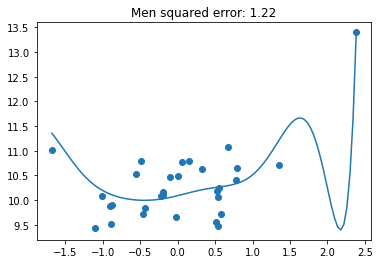

In [122]:
# Sample more data from the same process and check to see how well the model predicts the new scores

test_x, test_y = make_xy(30)

plt.scatter(test_x, test_y)

# update the x range
x_range = np.linspace(test_x.min(), test_x.max(), 100)
reg_line = pipeline.predict(x_range[:, None])
plt.plot(x_range, reg_line)

mse = mean_squared_error(y, pipeline.predict(test_x[:, None]))
plt.title(f"Men squared error: {mse:.2f}");

Now the model doesn't fit very well!

Instead, fit the data with the correct function form, which is a polynomial with degree 2

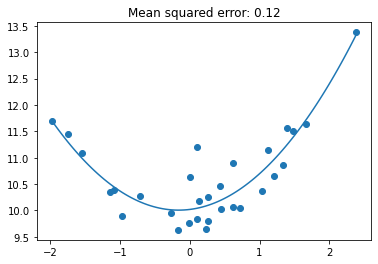

In [124]:
# Call our pipeline-generation function
pipeline = make_pipeline(2)

# Fit to the training data
pipeline.fit(x[:, None], y)

# Predict values for range of x
x_range = np.linspace(x.min(), x.max(), 100)
reg_line = pipeline.predict(x_range[:, None])

# Plot
plt.scatter(x, y)
plt.plot(x_range, reg_line)
mse = mean_squared_error(y, pipeline.predict(x[:, None]))
plt.title(f"Mean squared error: {mse:.2f}");

This looks right!

## Model validation

### Cross validation
Train and evaluate the model on other datasets

In [127]:
# Assign all brain features to X_all for convenience
X_all = data.filter(like='fs')

# Use age as our target 
y = data['age']

In [128]:
# this package splits an arbitrary number of array-like objects into training and testing subjects
from sklearn.model_selection import train_test_split

# for every arrary we pass to train_test_split, we get back two:
# a training set and a test set. The train_size parameter
# controls the proportion of all cases assigned to the training set 
# (the remainder are assigned to test).
split_vars = train_test_split(X_all, y, train_size=0.5)

# Python supports parallel assignment: if the number of variables on the 
# left side matches the number of elements in a list, the list elements will be mapped
# one-to-one onto the variables.
X_train, X_test, y_train, y_test = split_vars

# Verify shape...
X_train.shape


(502, 1440)

In [131]:
# Fit the estimator using trainig data to evaluate its performance
est = LinearRegression()

est.fit(X_train, y_train)

# Estimate R^2 separately for the training and test samples
r2_train = est.score(X_train, y_train)
r2_test = est.score(X_test, y_test)

print(f"R^2 in training sample: {round(r2_train, 2)}")
print(f"R^2 in test sample: {round(r2_test, 2)}")

R^2 in training sample: 1.0
R^2 in test sample: -0.52


There is a big difference here! 
In the training sample, the fitted model explains all the variance.
In the test sample, the fitted model explains none!
The linear regression model overfits out data because the model has too much flexibility relative to the data.

In [133]:
X_train.shape

(502, 1440)

We can fix the model by using fewer features. Let's try randomly sampling 200 of the 1440 features. 

In [134]:
# Randomly sample 200 features from the original set. The random_state
# is set just to ensure we get the same features if we re-run
X_small = X_all.sample(200, axis = 'columns', random_state=99)

# 50/50 train/test split again
X_train, X_test, y_train, y_test = train_test_split(X_small, y, train_size=0.5, random_state=99)

# Fit the model
est.fit(X_train, y_train)

# Estimate R^2 separately for the training and test samples
r2_train = est.score(X_train, y_train)
r2_test = est.score(X_test, y_test)

print(f"R^2 in training sample: {round(r2_train, 2)}")
print(f"R^2 in test sample: {round(r2_test, 2)}")

R^2 in training sample: 0.79
R^2 in test sample: 0.46


Much better! There is a still big gap between the in-sample and out-of-sample performance, but at least we know that our model is capable of predicting age reasonably well in subjects it hasn't seen before. 

### K-fold cross-validation

In [137]:
# the easy way

from sklearn.model_selection import cross_val_score

# Number of folds
K = 5

est = LinearRegression()

# cross_val_score takes an estimator, our variables, and an optional
# specification of the cross-validation procedure. Integers
# are interpreted as the number of folds to use in a k-folds partitioning. 
r2_cv = cross_val_score(est, X_small, y, cv=K)

print("Individual fold scores", r2_cv)
print(f"\nMean cross-validated R^2: {r2_cv.mean():.2f}")

Individual fold scores [0.60389708 0.53795077 0.56791833 0.56837218 0.55742804]

Mean cross-validated R^2: 0.57


The results of the 5-fold cross-validation differ from those we got when we used 50% of the data to train the model and 50% of it to test the model. Our out-of-sample performance is higher!

## Model selection

### Penalized regression
We want an estimator that's biased with respect to OLS, but tends to reduce error iin the test dataset. 
There are many such estimators! A popular class of estimators for regression problems is penalized regression. It is typical OLS with a penalty parameter. 

In [179]:
# Assign all brain features to X_all for convenience
features = data.filter(like='fs')

# Use age as our target 
y = data['age']

In [153]:
def plot_coef_path(estimator, X, y, alpha, ax=None, **kwargs):
    if ax is None:
        ax = plt.figure().gca()
    coefs = np.zeros((X.shape[1], len(alpha)))
    for (i, a) in enumerate(alpha):
        coefs[:,i] = estimator(alpha=a, **kwargs).fit(X, y).coef_
    ax.plot(alpha, coefs.T)
    ax.set_xlabel("Penalty (alpha)")
    ax.set_ylabel("Coefficient value")
    ax.set_xscale('log')

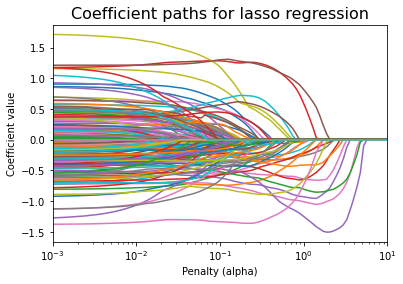

In [155]:
from  sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

NUMBER_OF_FEATURES = 200

X = features.sample(NUMBER_OF_FEATURES, axis=1, random_state=99)

# You can replace 'age' with 'age_resid' if you like
y = data['age']

# Note: we can standardize our features to mean-zero and unit-variance, 
# because lasso and ridge are sensitive to scale.
X = scale(X)

# Coefficient paths for ridge regression, predicting age from 30 features
alpha = np.logspace(-3, 1, 100)
plot_coef_path(Lasso, X, y, alpha, max_iter=2000)

plt.title("Coefficient paths for lasso regression", fontsize=16)
plt.xlim(1e-3, 10);

Each colored line represents a different feature. We're using 200 randomly selected features as predictors, so there are 200 lines. The x-axis displayed the penalty paraemter used for lasso estimation; the y-axis displays the resulting value of the coefficients. 

We are now faced with the possibility of many diffrent models!
We can conduct an experiment where fit all of these models and perform cross validation for all of these models, selecting the one that maximizes R^2 and minimizes error. 

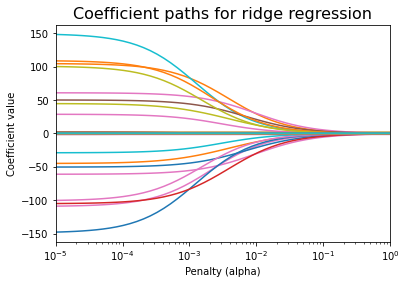

In [188]:
from sklearn.linear_model import Ridge

# Coefficient paths for ridge regression, predicting age from 30 features
alpha = np.logspace(-5, 5, 100)
plot_coef_path(Ridge, X, y, alpha)

plt.title("Coefficient paths for ridge regression", fontsize=16)
plt.xlim(1e-5, 1);

In [192]:
def plot_train_test(x_range, train_scores, test_scores, label, hlines=None):
    plt.plot(x_range, train_scores.mean(axis=1), label=f'{label} (train)', linewidth=2)
    plt.plot(x_range, test_scores.mean(axis=1), label=f'{label} (test)', linewidth=2)
    plt.grid(axis='y', linestyle='--')
    plt.xscale('log')
    plt.ylabel('$R^2$', fontsize=14)
    plt.xlabel('Penalty (alpha)', fontsize=14)
    plt.ylim(0, 1)

    if hlines:
        for lab, line in hlines.items():
            plt.hlines(line, x_range.min(), x_range.max(), linestyle='--', linewidth=2, label=lab)
            
    plt.legend(fontsize=14)
    

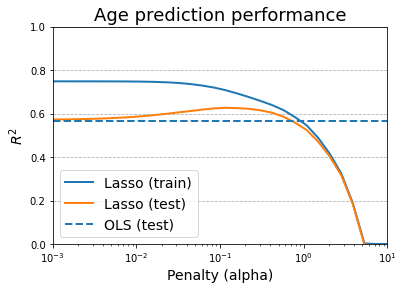

In [193]:
from sklearn.model_selection import validation_curve

x_range=np.logspace(-3, 1, 30)
train_scores, test_scores = validation_curve(Lasso(max_iter=5000), X, y,
                                            param_name='alpha',
                                            param_range=x_range,
                                            cv=5,
                                            scoring='r2')

# Add OLS R^2 for references
ols_r2 = cross_val_score(LinearRegression(), X, y, scoring = 'r2', cv=5).mean()

plot_train_test(x_range, train_scores, test_scores, 'Lasso', hlines = {'OLS (test)': ols_r2})
plt.title("Age prediction performance", fontsize=18)
plt.xlim(1e-3, 10);

The model improves its performance and then goes down. It has an optimal level of bias that reduces the variance so much that the error goes down. 

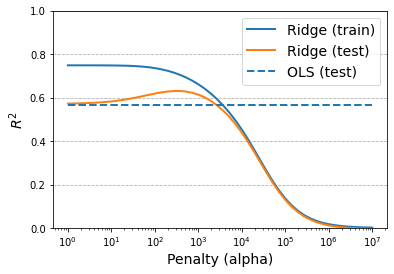

In [194]:
x_range=np.logspace(0, 7, 50)
train_scores, test_scores = validation_curve(Ridge(), X, y,
                                            param_name='alpha',
                                            param_range=x_range,
                                            cv=5,
                                            scoring='r2')

# Add OLS R^2 for references
ols_r2 = cross_val_score(LinearRegression(), X, y, scoring = 'r2', cv=5).mean()

plot_train_test(x_range, train_scores, test_scores, 'Ridge', hlines = {'OLS (test)': ols_r2})